In [ ]:
# Goals of EDA:
1. Data cleaning
2. Descriptive Stat.
3. Data Visualization
4. Feature engineering
5. Correlation and relationship
6. Data segmentation
7. Hypothesis
8. Data quality

# types of EDA:
1. Univarite Analysis
2. Bivarite Analysis
3. Multivarite analysis
4. Time series
5. Missing data analysis
6. Outlier Analysis
7. Data Vis.

In [4]:
# import package
import pandas as pd

#load my data
df = pd.read_csv('/content/employees.csv')

df.head() # for printing first 5 rows

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


**Task 1 - insight about the data !!**

In [5]:
df.shape

#we findout the rows / columns

(1000, 8)

In [6]:
# DS
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [7]:
df.describe(include='object')

,First Name,Gender,Start Date,Last Login Time,Senior Management,Team
count,933,855,1000,1000,933,957
unique,200,2,972,720,2,10
top,Marilyn,Female,10/30/1994,1:35 PM,True,Client Services
freq,11,431,2,5,468,106


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


**Task 2 - Dtype converstion (object to datetime)**

In [14]:
df['Start Date'] = pd.to_datetime(df['Start Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         933 non-null    object        
 1   Gender             855 non-null    object        
 2   Start Date         1000 non-null   datetime64[ns]
 3   Last Login Time    1000 non-null   object        
 4   Salary             1000 non-null   int64         
 5   Bonus %            1000 non-null   float64       
 6   Senior Management  933 non-null    object        
 7   Team               957 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 62.6+ KB


In [16]:
# uniques

df.nunique()

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

**Task 3 - Missing Values Handling**  

1. detect the missing  
2. drop
3. fill
4. replace  
---------

python function handling missing values:
1. isnull()
2. notnull()
3. dropna()
4. fillna()
5. replace()

In [19]:
df.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [24]:
#Gender

df['Gender'].fillna("No Gender", inplace=True)
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [27]:
import numpy as np

mode = df['Senior Management'].mode().values[0]

df['Senior Management'] = df['Senior Management'].replace(np.nan, mode)

df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

In [29]:
df = df.dropna(axis=0, how='any')

print(df.isnull().sum())
df.shape

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64


(899, 8)

**Task 4 - Data Encoding**

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])


In [33]:
df['Gender'].unique()

array([1, 0, 2])

**Task 5 - Data visualization**

packages:
1. matplotlib
2. seaborn


**Histogram**
-univariate
-bivarite  

use - data distributions
    - for numerical data

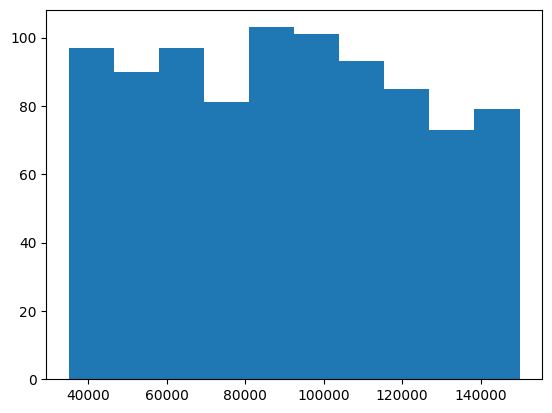

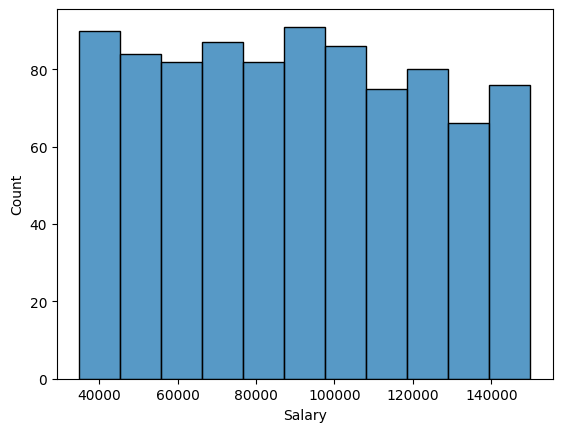

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.hist(df['Salary'])
plt.show()

sns.histplot(x='Salary', data=df)
plt.show()

**Box plot**

univariate and bivariate analyses


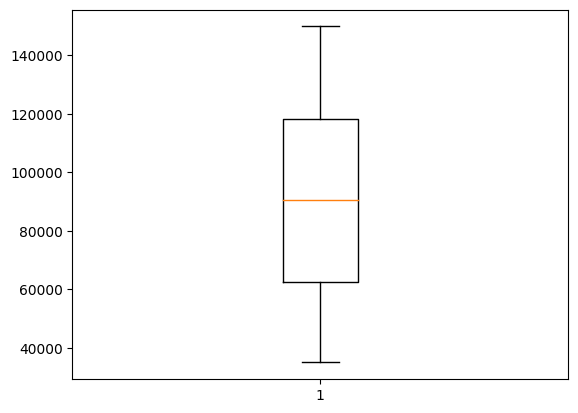

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.boxplot(df['Salary'])
plt.show()

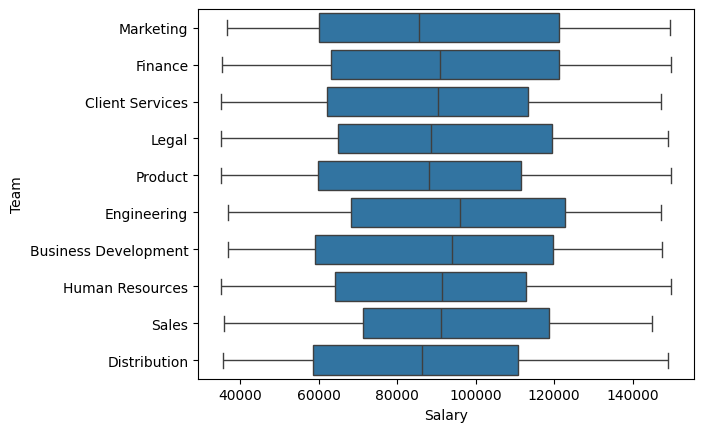

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x = 'Salary', y='Team', data=df)
plt.show()

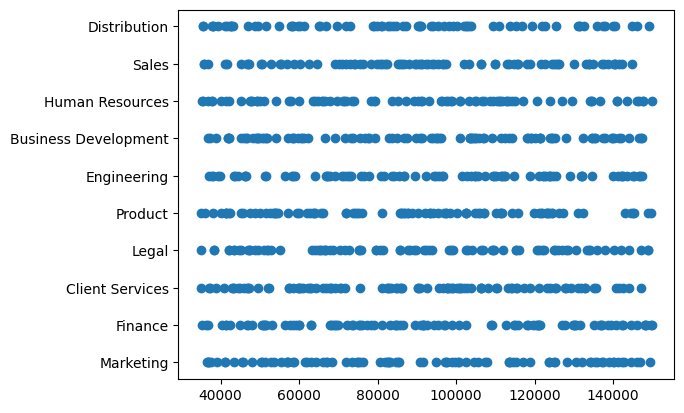

In [49]:
plt.scatter(df['Salary'], df['Team'])
plt.show()

In [ ]:
What is the primary purpose of using Matplotlib and Seaborn in Exploratory Data Analysis (EDA)?
a) Perform statistical analysis

b) Handle missing data

c) Create meaningful data visualizations

d) Build machine learning models

In [ ]:
Which of the following is a correct syntax to create a scatter plot using Matplotlib?
a) plt.scatter(x, y)

b) plt.plot(x, y, kind=’scatter’)

c) plt.create_scatter(x, y)

d) scatter.plot(x, y)

In [ ]:
What does the term “boxplot” refer to in data visualization?
a) A plot with boxes and whiskers

b) A plot with only boxes

c) A plot with lines connecting data points

d) A plot with circular markers

In [ ]:
Which Seaborn function is used to create a histogram?
a) sns.plot_histogram()

b) sns.histplot()

c) sns.create_hist()

d) sns.barplot()

In [ ]:
What type of visualization is suitable for displaying the distribution of a single continuous variable?
a) Scatter plot

b) Bar chart

c) Pie chart

d) Histogram

In [50]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,1,1993-08-06,12:42 PM,97308,6.945,True,Marketing
2,Maria,0,1993-04-23,11:17 AM,130590,11.858,False,Finance
3,Jerry,1,2005-03-04,1:00 PM,138705,9.340,True,Finance
4,Larry,1,1998-01-24,4:47 PM,101004,1.389,True,Client Services
5,Dennis,1,1987-04-18,1:35 AM,115163,10.125,False,Legal


**Scatter**

bivariate analysis

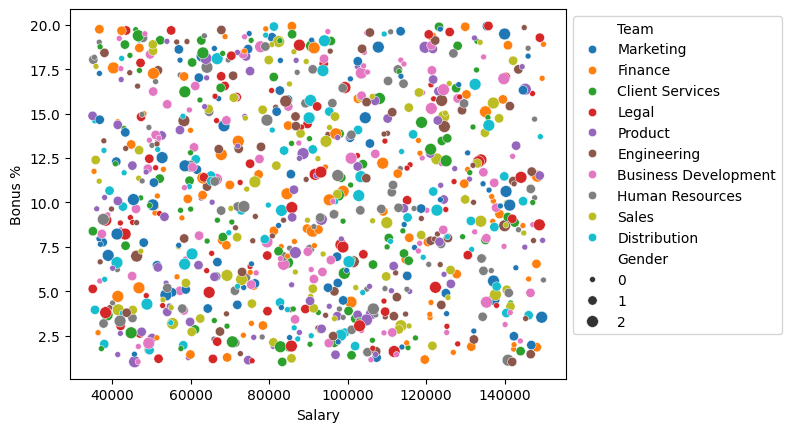

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = 'Salary', y='Bonus %', data=df, hue='Team', size='Gender')
plt.legend(bbox_to_anchor =(1,1), loc=2)

plt.show()


**Pairplot**
- multivariate analysis
-

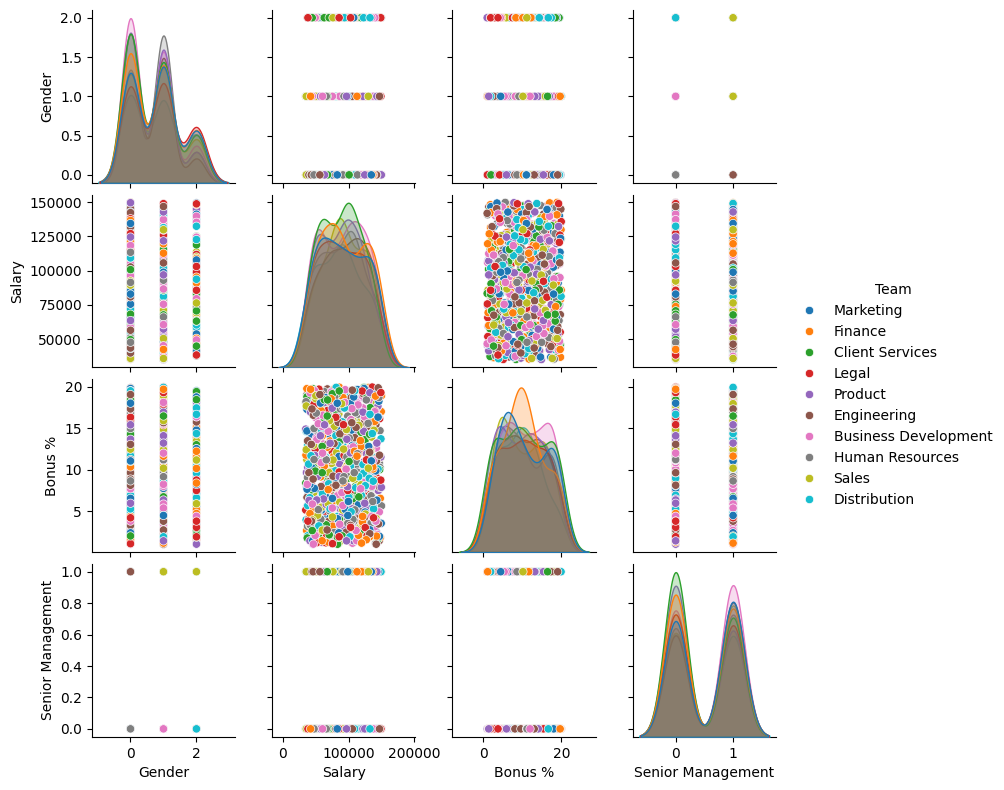

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Team', height=2)
plt.show()

**Task 6 Outlier Handling**

In [64]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

df2 = pd.read_csv('/content/Iris.csv')

df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='SepalWidthCm'>

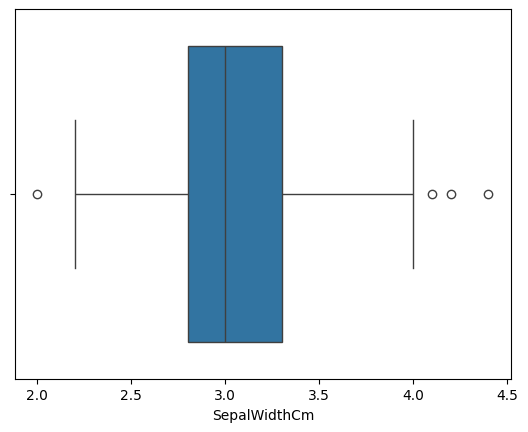

In [67]:
sns.boxplot(x = 'SepalWidthCm', data=df2)

In [ ]:
# Remove Outlier

Interquartile Range (IQR) :

Q1 -
Q2 -
Q3 -

IQR = Q3 - Q1

Data:
1, 19, 7, 6, 5, 9, 12, 27, 18, 2, 15

sort :
1, 2, 5, 6, 7, 9, 12, 15, 18, 19, 27

median
Q2 = 9

Q1 comes from lowest between value
Q1 = 5

Q3 comes from highest between values
Q3 = 18

IQR = 18 - 5 = 11


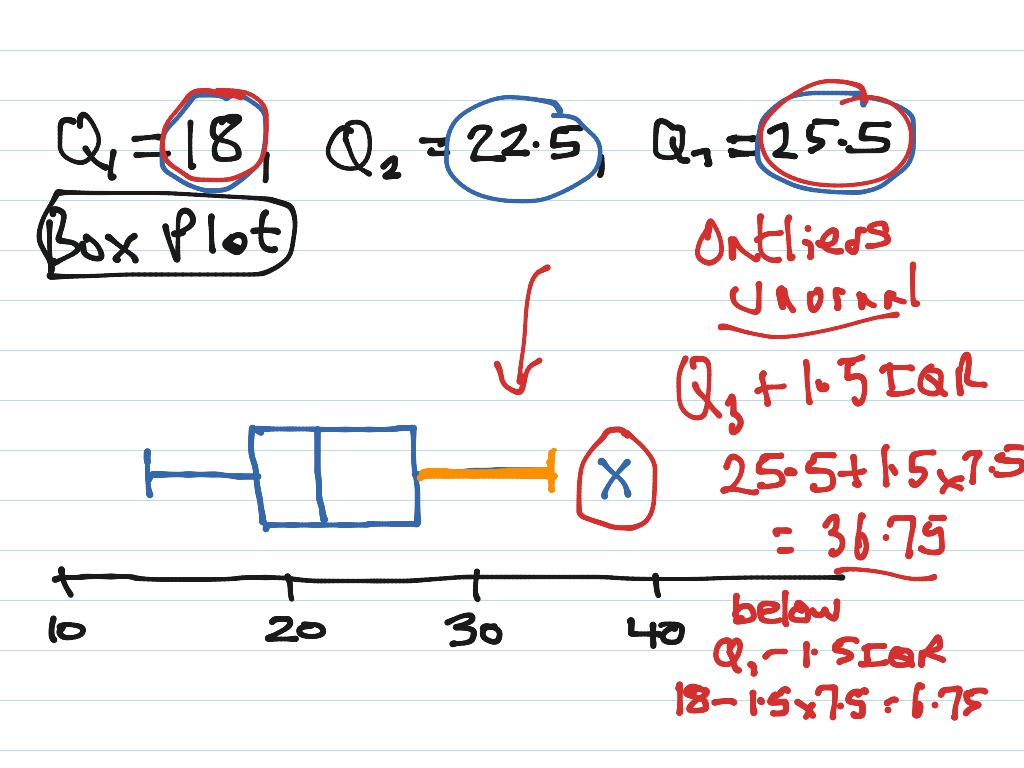

In [68]:
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


New shape :  (899, 8)


<Axes: xlabel='SepalWidthCm'>

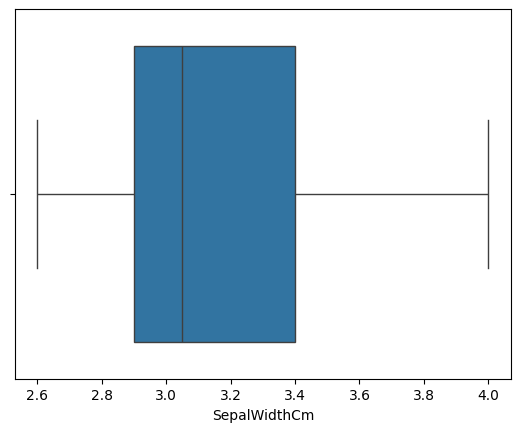

In [69]:
#IQR
import numpy as np

Q1 = np.percentile(df2['SepalWidthCm'], 25, interpolation = 'midpoint')

Q3 = np.percentile(df2['SepalWidthCm'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1


#upper bound
upper = np.where(df2['SepalWidthCm'] >= (Q3+1.5*IQR))

#lower bound
lower = np.where(df2['SepalWidthCm'] <= (Q3-1.5*IQR))

#remove the outliers:
df2.drop(upper[0], inplace=True)
df2.drop(lower[0], inplace=True)

print("New shape : ", df.shape)

sns.boxplot(x='SepalWidthCm', data=df2)